In [10]:
import pandas as pd

sensus = {
    'Tinggi' : [150, 160, 170, 180, 190],
    'Berat' : [60, 70, 80, 90, 100] ,
    'JK' : [ 'PRIA', 'WANITA', 'PRIA', 'PRIA', 'WANITA']
    }

sensus_df = pd.DataFrame(sensus)
sensus_df

,Tinggi,Berat,JK
0,150,60,PRIA
1,160,70,WANITA
2,170,80,PRIA
3,180,90,PRIA
4,190,100,WANITA


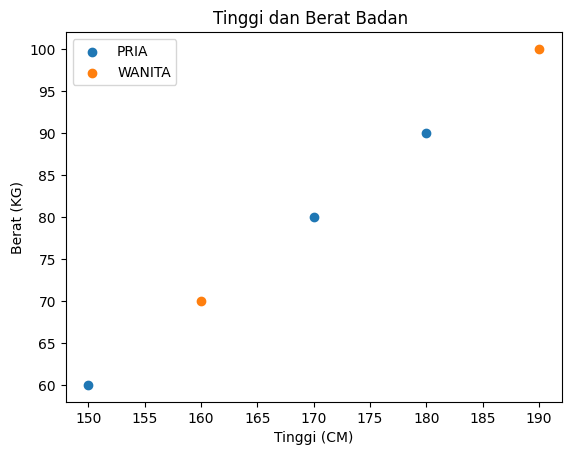

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('JK'):
    ax.scatter(d['Tinggi'], d['Berat'], label=jk) #Label  = jk memunculkan tulisan pria/wanita

ax.legend(loc = 'upper left')
ax.set_title('Tinggi dan Berat Badan ')
ax.set_xlabel('Tinggi (CM)')
ax.set_ylabel('Berat (KG)')
plt.show()

In [12]:
# classification dengan KNN

#preprocessing Dataset

import numpy as np

X_train = np.array(sensus_df[['Tinggi', 'Berat']])
y_train = np.array(sensus_df['JK'])

print (f'X_train:\n{X_train}\n')
print (f'y_train: {y_train}') #Karena tipe data string maka khawatir problem di evaluasi model, hal yang harus dilakukan adalah mengganti tipe data ke numerik


X_train:
[[150  60]
 [160  70]
 [170  80]
 [180  90]
 [190 100]]

y_train: ['PRIA' 'WANITA' 'PRIA' 'PRIA' 'WANITA']


In [13]:
#Karena hanya ada 2 kategori kita bisa menggunakan Label binarizer

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)

print (f'y_train:\n{y_train}') # hasilnya mengeluarkan array 2 dimensi kita ubah dulu menjadi satu dimensi


y_train:
[[0]
 [1]
 [0]
 [0]
 [1]]


In [14]:
y_train= y_train.flatten ()
print (f'y_train:\n{y_train}')

y_train:
[0 1 0 0 1]


In [15]:
#Training Knn Classification Model

from sklearn.neighbors import KNeighborsClassifier

k = 3 #pararmeter k digunakan sebagai jumlah tetangga terdekat yang akan dilibatkan
model = KNeighborsClassifier(n_neighbors=k)
model = model.fit(X_train, y_train)

In [16]:
#Prediksi Jenis Kelamin

#DATA BARU
Tinggi_badan = 160
Berat_badan = 70

x_new = np.array([[Tinggi_badan, Berat_badan]])
x_new

array([[160,  70]])

In [17]:
#Memprediksi
y_pred = model.predict(x_new)
y_pred

array([0])

In [18]:
lb.inverse_transform(y_pred) #melihat hasil prediksi dalam bentuk awal

array(['PRIA'], dtype='<U6')

In [19]:
#Evaluasi KNN Classificaton Model

#Testing Set
x_test = np.array([[168, 65], [180, 90], [160, 50]])
y_test = lb.fit_transform(['PRIA', 'WANITA', 'WANITA']).flatten()

print (f'X_test:\n{x_test}\n')
print (f'y_test:\n{y_test}')

X_test:
[[168  65]
 [180  90]
 [160  50]]

y_test:
[0 1 1]


In [20]:
#prediksi Terhadap Testing SET

y_pred = model.predict(x_test)
y_pred

array([0, 0, 0])

In [21]:
# evaluasi dengan accuracy score

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.3333333333333333

In [22]:
#evaluasi dengan precission score

from sklearn.metrics import precision_score

precision_score(y_test, y_pred) #jika score tidak keluar maka kemngkinan precission score tidak mendeteksi sebuah kelas positif sama sekali

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [25]:
#evaluasi dengan metric recall

from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.0

In [24]:
#evaluasi dengan F1 score

from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.0

In [26]:
#classification report
#memunculkan semua report dari metric evaluasi

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#metric evaluasi Matthews correlation coefficient (MCC) , metric ini adalah alternative dari metric f1 score

from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)


0.0